# Digital Epidemiology Final Project

**LEONARDO LAVAGNA 1650170**

**GROUP 14**

## PART 1 . Simulation of an epidemic on a given network using an SIR model

### Set up

In [1]:
#!pip install EoN

In [2]:
# LIBRARIES

import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
import EoN
import random
import numpy as np
import pandas as pd

In [3]:
# GLOBAL PARAMETERS

#transmission rates
beta  = 0.005
betas = [10*beta,beta/10]

#recovery rate
gamma = 0.025

#times
t0   = 0
tmax = 100

#r0
r0 = beta/gamma
print("Value of r_0:", r0)

#percentage of initial infected
rho = 0.1

Value of r_0: 0.19999999999999998


### Graph creation

In [4]:
# GRAPH

g = nx.read_edgelist("edges-13.csv",delimiter=',',create_using=nx.Graph(),nodetype=int)

In [5]:
# CHECK

print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 5345
Number of edges: 25639
Average degree:   9.5936


In [6]:
# POPULATION SIZE

N = g.number_of_nodes()

In [7]:
# NODES POSITIONS FOR PLOTTING

spring_pos = nx.spring_layout(g)

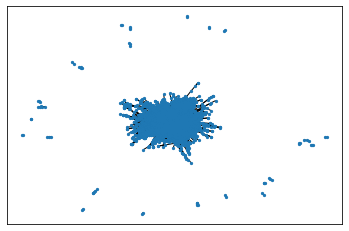

In [8]:
# PLOT

nx.draw_networkx(g,pos=spring_pos,with_labels=False,node_size=5)

### SIR simulation

In [9]:
# SIMULATION

sim = EoN.Gillespie_SIR(g,tau = beta, gamma = gamma,return_full_data=True)
t, S, I, R = EoN.Gillespie_SIR(g,tau = beta, gamma = gamma,rho = rho)

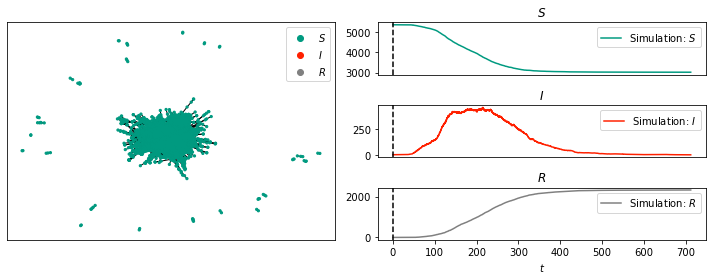

In [10]:
# PLOTS AT TIME t0

sim.display(time=t0,pos=spring_pos,node_size=5)
plt.show()

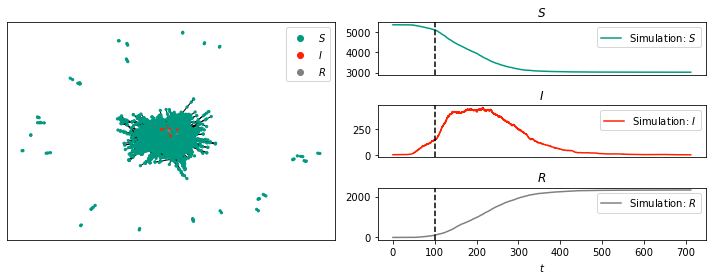

In [11]:
# PLOTS AT TIME tmax

sim.display(time=tmax,pos=spring_pos,node_size=5)
plt.show()

### SIR dynamics

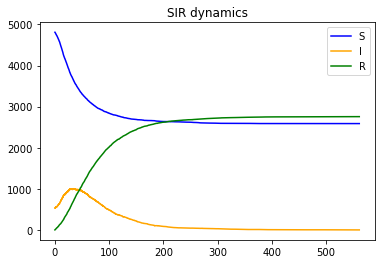

In [12]:
# PLOTS OF THE SIR DYNAMICS

fig, ax = plt.subplots()
ax.plot(t, S, label = "S",color="blue")
ax.plot(t, I, label = "I",color="orange")
ax.plot(t, R, label = "R",color="green")
plt.title("SIR dynamics")
plt.legend(loc="best")
plt.show()

In [13]:
# EPIDEMIC SIZE

I.argmax()/N

0.3547240411599626

### Analysis of the final epidemic size as beta changes when gamma is fixed 


In [14]:
# SIMULATION IN THE CASE r0>1

t1, S1, I1, R1 = EoN.Gillespie_SIR(g,tau = betas[0], gamma = gamma,rho = rho)

In [15]:
# SIMULATION IN THE CASE r0<1

t2, S2, I2, R2 = EoN.Gillespie_SIR(g,tau = betas[1], gamma = gamma,rho = rho)

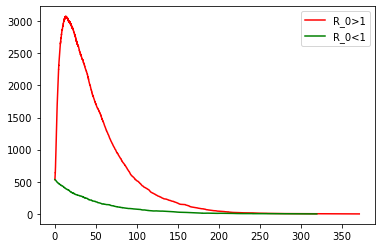

In [16]:
# PLOTS

plt.plot(t1, I1, color='r', label='R_0>1')
plt.plot(t2, I2, color='g', label='R_0<1')
plt.legend()
plt.show()

### Study of the epidemic threshold

**Reference**: Gabriel Fabricius, Alberto Maltz, Exploring the threshold of epidemic spreading for a stochastic SIR model with local and global contacts, Physica A: Statistical Mechanics and its Applications, Volume 540, 2020, 123208, ISSN 0378-4371, https://doi.org/10.1016/j.physa.2019.123208. 

**Online Version of the Reference**: https://www.sciencedirect.com/science/article/pii/S0378437119318035)

In [17]:
# SIMULATION

sim_thr = EoN.Gillespie_SIR(g, tau=gamma, gamma=gamma, return_full_data=True)
t_thr, S_thr, I_thr, R_thr = EoN.Gillespie_SIR(g, tau=gamma, gamma=gamma, rho=rho)

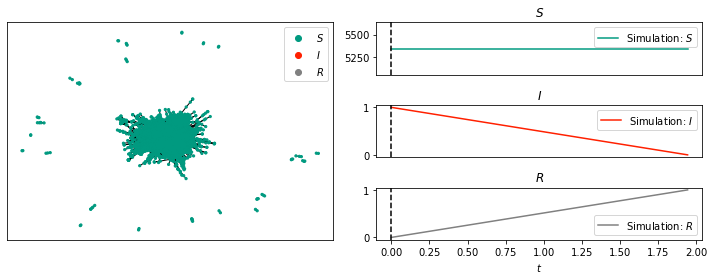

In [18]:
# PLOTS AT TIME t0

sim_thr.display(time=t0, pos=spring_pos,node_size=5)
plt.show()

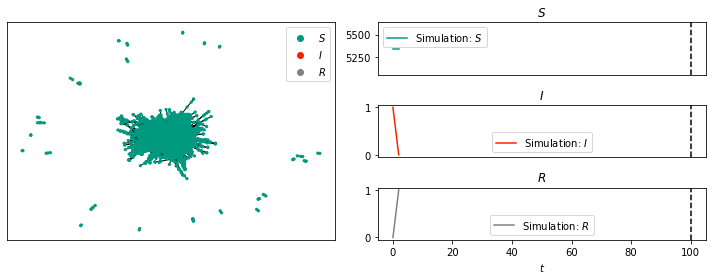

In [19]:
# PLOTS AT TIME tmax

sim_thr.display(time=tmax, pos=spring_pos,node_size=5)
plt.show()

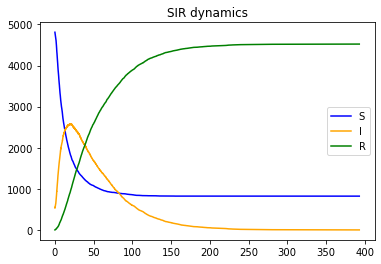

In [20]:
# PLOTS OF THE SIR DYNAMICS

fig, ax = plt.subplots()
ax.plot(t_thr, S_thr, label = "S",color="blue")
ax.plot(t_thr, I_thr, label = "I",color="orange")
ax.plot(t_thr, R_thr, label = "R",color="green")
plt.title("SIR dynamics")
plt.legend(loc="best")
plt.show()

## SUPPLEMENT TO PART 1 . Equivalence of EoN.Gillespie_SIR and EoN.fast_SIR
**Reference**: https://arxiv.org/pdf/2001.02436.pdf

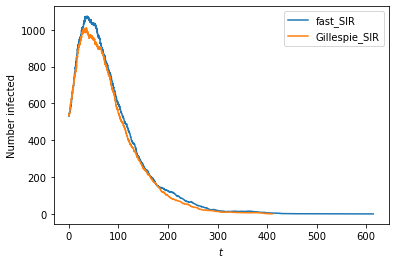

In [21]:
# EQUIVALENCE EoN.Gillespie_SIR AND EoN.fast_SIR

t_f, S_f, I_f, R_f = EoN.fast_SIR(g, tau=beta, gamma=gamma, rho=rho)
t_g, S_g, I_g, R_g = EoN.Gillespie_SIR(g, tau=beta, gamma=gamma, rho=rho)

plt.plot(t_f, I_f, label = 'fast_SIR')
plt.plot(t_g, I_g, label = 'Gillespie_SIR')
plt.xlabel('$t$')
plt.ylabel('Number infected')
plt.legend()
plt.show()

## PART 2 . Generate a random network by randomly rewiring a variable percentage of edges and repeat Part 1

### Graph creation

In [22]:
# PARAMETERS

#percentage of edges to rewire
p = 0.3

In [23]:
# EXAMPLE GRAPHS WITH 30% OF EDGES REMOVED

#Copy of g
g_s = nx.read_edgelist("edges-13.csv",delimiter=',',create_using=nx.Graph(),nodetype=int)

#population size
N_s = g_s.number_of_nodes()

#Sample a percentage p of random edges and nodes
sampled_edges = random.sample(g_s.edges,int(p*N_s))
sampled_nodes = random.sample(g_s.nodes,int(p*N_s))

#rewire a percentage p of random edges
for e in sampled_edges:
    #remove random edge
    g_s.remove_edge(*e)
    #add back the edge
    uv = random.sample(g_s.nodes,2)
    g_s.add_edge(*uv)

#check
print(nx.info(g_s))

Name: 
Type: Graph
Number of nodes: 5345
Number of edges: 25639
Average degree:   9.5936


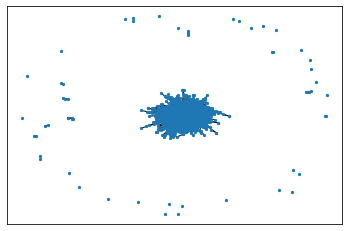

In [24]:
# PLOTS

spring_pos_gs = nx.spring_layout(g_s)
nx.draw_networkx(g_s,pos=spring_pos_gs,with_labels=False,node_size=5)

### Repeat Part 1 with the new graph

In [25]:
# SIR SIMULATION

t_s, S_s, I_s, R_s = EoN.Gillespie_SIR(g_s, tau=beta, gamma=gamma, rho=rho)

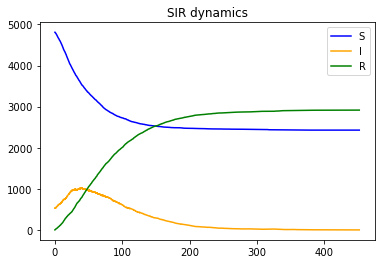

In [26]:
# PLOTS OF THE SIR DYNAMICS

fig, ax = plt.subplots()
ax.plot(t_s, S_s, label = "S",color="blue")
ax.plot(t_s, I_s, label = "I",color="orange")
ax.plot(t_s, R_s, label = "R",color="green")
plt.title("SIR dynamics")
plt.legend(loc="best")
plt.show()

In [27]:
# EPIDEMIC SIZE

I_s.argmax()/N_s

0.39083255378858744

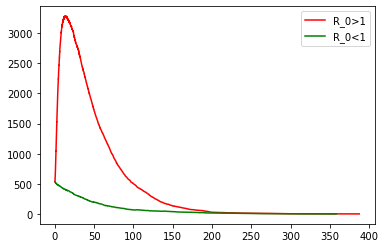

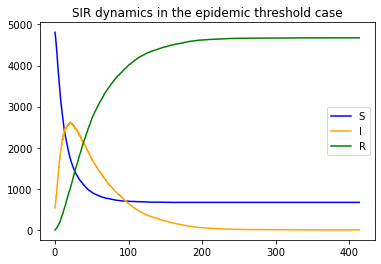

In [28]:
# ANALYSIS OF THE FINAL EPIDEMIC SIZE AS BETA CHANGES WHEN GAMMA IS FIXED 

#Simulation when r0>1
t3, S3, I3, R3 = EoN.Gillespie_SIR(g_s,tau = betas[0], gamma = gamma,rho = rho)

#Simulation when r0>1
t4, S4, I4, R4 = EoN.Gillespie_SIR(g_s,tau = betas[1], gamma = gamma,rho = rho)

#plots of the SIR dynamics
plt.plot(t3, I3, color='r', label='R_0>1')
plt.plot(t4, I4, color='g', label='R_0<1')
plt.legend()
plt.show()

#Simulation in the case of epidemic threshold
t5, S5, I5, R5 = EoN.Gillespie_SIR(g_s,tau=gamma, gamma = gamma,rho = rho)

#plots of the SIR dynamics
fig, ax = plt.subplots()
ax.plot(t5, S5, label = "S",color="blue")
ax.plot(t5, I5, label = "I",color="orange")
ax.plot(t5, R5, label = "R",color="green")
plt.title("SIR dynamics in the epidemic threshold case")
plt.legend(loc="best")
plt.show()

## PART 3 . Repeat Part 1 with part of the population immunized


### Auxiliary functions

In [29]:
class SIR:
    def __init__(self, graph, beta=beta, mu=gamma):
        self.g = graph.copy()   
        self.N = g.order()
        self.BETA = beta  # infection rate
        self.MU = mu      # recovery rate
        self.keys=['t', 'S', 'I', 'R', 'SI', 'IR']
        self.data = { k: [] for k in self.keys }
        self.data_normalized = { k: [] for k in self.keys}
        self.attack_rate=0.0
        self.peak_time=0.0
        self.seed=0
        
    def random_immunization(self, frac):
        n=int(self.N * frac)
        immune = list(np.random.choice(self.g.nodes(), size=n, replace=False))
        for node in immune:
            self.g.remove_node(node)
            
    def prioritized_immunization(self, frac, flag="cc"):
        '''
        apply immunization ordering for higher degree centrality
        '''
        n=int(self.N * frac)
        
        degree_dict=self.g.degree()
        if flag=="cc":
            degree_dict=nx.closeness_centrality(g)
        elif flag=="bc":
            degree_dict=nx.betweenness_centrality(g)
        elif flag=="c":
            degree_dict=nx.betweenness_centrality(g)
            
        degree=sorted( [(k, degree_dict[k]) for k in degree_dict], key=lambda u:u[1], reverse=True )
        immune=[d[0] for d in degree[:n]]
        for node in immune:
            self.g.remove_node(node)

            
    def sample_immunization(self, frac, g_sample, thresh):
        '''
        degree immunization and random immunization (if r > k)  
        '''
        n=int( self.N * frac )
        degree_dict_tot=g_sample.degree()
        ## remove nodes with degree 1 (better to sample random)
        degree_dict={k: int(degree_dict_tot[k]) for k in degree_dict_tot if degree_dict_tot[k] > thresh}
        ## sort
        degree=sorted( [(k, degree_dict[k]) for k in degree_dict], key=lambda u:u[1], reverse=True )
        immune=[d[0] for d in degree[:n]]
        for node in immune:
            self.g.remove_node(node)
        
        x = (n - len(degree))
        if x > 0:
            x = x / self.N
            self.random_immunization(x)
        
    def run(self, seed=[], num_steps=1, priority="", frac=0.0, nodes={}, g_sample={}, thresh=1):
        if priority=="random":
            self.random_immunization(frac)
        elif priority=="degree":
            self.prioritized_immunization(frac)
        elif priority=="sample_immunization":
            self.sample_immunization(frac, g_sample, thresh)
            
        if not len(seed):
            seed = list(np.random.choice(self.g.nodes(), size=1, replace=False))
            
        # initialize sets of S/I/R nodes
        I = set(seed)
        S = set(self.g.nodes()).difference(I)
        R = set()
        t = 0
        
        SI = set(seed) #S->I transition
        IR = set()     #I->R transition
        
        while True:
            # generator logic: yield current status every num_steps iterations
            if t % num_steps == 0:
                data=[t, len(S), len(I), len(R), len(SI), len(IR)]
                for i in range(len(self.keys)):
                    k=self.keys[i]
                    self.data[k].append(data[i])
            # stop when there are no infectious nodes left
            if not len(I):
                # compute attack rate
                self.attack_rate=self.data["R"][-1]/self.N
                # compute peak time
                ii=np.argmax(self.data["I"])
                self.peak_time=self.data["t"][ii]
                # normalize data
                self.data_normalized = {k: [v/self.N for v in self.data[k]] for k in self.data if k not in ["t"]}
                break

            SI = set()
            IR = set()
            
            # loop over neighbors of infectious nodes
            for i in set(I):
                # TRANSMISSION
                for j in S.intersection(self.g.neighbors(i)):
                    # Bernoulli sampling
                    if np.random.uniform() < self.BETA:
                        S.remove(j)
                        I.add(j)
                        SI.add(j)
                        
                # RECOVERY
                if np.random.uniform() < self.MU:
                    I.remove(i)
                    R.add(i)
                    IR.add(i)
                    
            t += 1
            
    def getSeed(self):
        return self.seed
    def getData(self):
        return self.data
    def getDataNormalized(self):
        return self.data_normalized
    def getAttackRate(self):
        return self.attack_rate
    def getPeakTime(self):
        return self.peak_time


In [30]:
def plot_sir(plt, data, keys=["S", "I", "R"], names=['susceptible', 'infectious', 'recovered'], title="", flag=True):
    for k in keys:
        plt.plot(data[k])
        
    if flag:
        plt.title(title)
        plt.xlabel('time')
        plt.ylabel('# nodes')
        plt.legend(names,loc="best")

### Initial immunized choosed at random

In [39]:
# SIMULATION WITHOUT IMMUNIZATION

sir = SIR(g)
sir.run()
data=sir.getDataNormalized()

In [46]:
# SIMULATION WITH RANDOM IMMUNIZATION

sir = SIR(g)
sir.run(priority="random", frac=0.2)
data_immunization=sir.getDataNormalized()

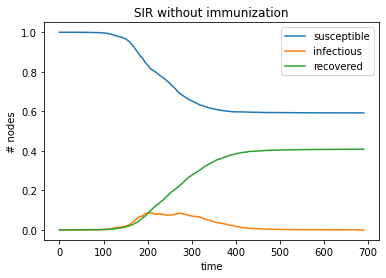

In [41]:
# PLOTS

plot_sir(plt,data, title="SIR without immunization")

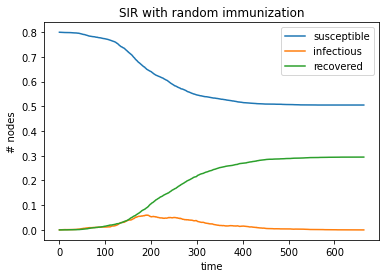

In [47]:
# PLOTS

plot_sir(plt,data_immunization, title="SIR with random immunization")

### Initial immunized choosed following the closeness centrality

In [43]:
# SIMULATION WITH CLOSENESS IMMUNIZATION
sir = SIR(g)
sir.run(priority="degree", frac=0.1)

In [44]:
# GET THE DATA FOR PLOTTING

data_immunization=sir.getDataNormalized()

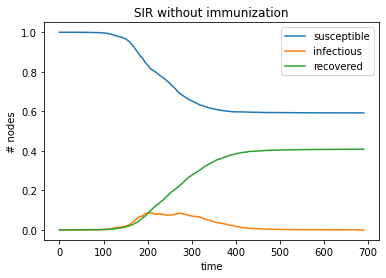

In [45]:
# PLOTS

plot_sir(plt,data, title="SIR without immunization")

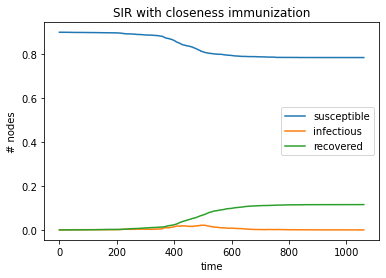

In [38]:
# PLOTS

plot_sir(plt,data_immunization, title="SIR with closeness immunization")